### Test Preprocessing

In [20]:
from VideoGame import utils

In [10]:
text = '''Well organized and easy to understand Web building..& @
tutorials with 898 lots of examples of how to use HTML, CSS, JavaScript, SQL, 
PHP, Python, Bootstrap, Java and XML.'''

In [11]:
utils.preprocess(text)

'well organized easy understand web building tutorial lot example use html cs javascript sql php python bootstrap java xml'

In [4]:
from packages.preprocess import *

In [5]:
lemmatizer(text)

'Well organized and easy to understand Web building .. & @ tutorial with 898 lot of example of how to use HTML , CSS , JavaScript , SQL , PHP , Python , Bootstrap , Java and XML .'

In [7]:
!tree

.
├── Capstone_project_2
│   ├── Report
│   │   ├── Amazon_sentiment_analysis_presentation.pdf
│   │   ├── Capstone\ project\ 2\ ideas.pdf
│   │   ├── Final_report_capstone2.pdf
│   │   ├── Milestone_report1_capstone2.pdf
│   │   ├── Milestone_report2_capstone2.pdf
│   │   ├── Project_proposal_capstone_2.pdf
│   │   └── readme.md
│   ├── code
│   │   ├── Amazon-Headphones_data_wrangling.ipynb
│   │   ├── Amazon-headphones_EDA.ipynb
│   │   ├── Amazon_headphones_Sentiment_Analysis_CV_IF_IDF_HASH.ipynb
│   │   ├── Amazon_headphones_wordvec.ipynb
│   │   ├── amazon_electronics_recommendation.ipynb
│   │   ├── big.txt
│   │   ├── contractions.py
│   │   └── readme.md
│   └── readme.md
├── Notebooks
│   ├── DataPreproc.ipynb
│   ├── Recommendation.ipynb
│   ├── binary.pkl
│   ├── content\ based\ recommendation.ipynb
│   ├── data_user_prod.pickle
│   ├── df_user_prod.pickle
│   ├── preprocessed.pkl
│   ├── product_review_df.pickle
│   ├── product_review_df.pickle.zip
│   ├── requirements.
│ 

### Test Load Latent df

In [1]:
from VideoGame.contentBasedRec import ContentRecommender

In [2]:
rec = ContentRecommender()


In [3]:
rec.get_recommendation()

['The Legend of Legacy',
 'Girls RPG: Cinderellife',
 'Inazuma Eleven Go 2: Chrono Stone',
 'Yokai Watch 2 Shinuchi',
 'Medabots Girls Mission: Metabee Ver. / Rokusho Ver.']

## Try get game list

In [1]:
from VideoGame import utils

In [2]:
utils.get_model()

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('nb', MultinomialNB(alpha=1, class_prior=None, fit_prior=True))])

## Try Load Data from Google Cloud


## Try load Model

In [20]:
from pkg import utils

In [21]:
model = utils.get_model()

In [22]:
import pickle
with open(r"NaiveBayes.pickle", "wb") as output_file:
    pickle.dump(model, output_file)

In [23]:
with open(r"NaiveBayes.pickle", "rb") as file:
    model = pickle.load(file)

In [24]:
model.predict(['''Graphics and gameplay were good. 
The game is somewhat linear and not a lot of different 
things to do, but still pretty fun'''])

array([1])

## Try Load Model from GC

In [15]:
from google.cloud import storage

In [16]:
import os

In [18]:
credentials_raw = os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')

In [19]:
from google.cloud import storage
from sklearn.externals import joblib

storage_client = storage.Client()
bucket_name=<bucket name>
model_bucket='model.joblib'
model_local='local.joblib'

bucket = storage_client.get_bucket(bucket_name)
#select bucket file
blob = bucket.blob(model_bucket)
#download that file and name it 'local.joblib'
blob.download_to_filename(model_local)
#load that file from local file
job=joblib.load(model_local)

In [20]:
from google.cloud import storage
from sklearn.externals import joblib

In [56]:
credentials_raw = open('access.json').read()

In [26]:
import json
creds_json = json.loads(credentials_raw)

In [27]:
from google.oauth2 import service_account
creds_gcp = service_account.Credentials.from_service_account_info(creds_json)

In [58]:
import pickle

with open (r"creds_gcp.plk", "wb") as file:
    pickle.dump(credentials_raw, file)


In [29]:
# video-game-rec-99/Model/Logistic.joblib

client = storage.Client(credentials=creds_gcp, 
                        project="amazonreview-297414").bucket("video-game-rec-99")



In [43]:
storage_location = 'Model/NaiveBayes.joblib'

In [44]:
blob = client.blob(storage_location)

In [45]:
blob.download_to_filename('Logistic.joblib')

In [46]:
model = joblib.load('Logistic.joblib')

In [35]:
import joblib

In [47]:
model = joblib.load("Logistic.joblib")

In [48]:
model.predict(["I have to be honest.. When I first started the game, it was rather boring BUT everyone told me that I was still in the prologue and that once the actual game started, the action and story would pick up dramatically. They were right! Not only are the graphics amazing, but the game overall is beautiful. The action is intense, and I found myself actually getting invested in a few of the characters\' storylines. Very good game!"])

array([1])

In [49]:
string = 'Opened my amazon package to see the game box crushed and a corner of the plastic completely separated from the disc holder, disc was loosely moving inside the game box\'s casing probably for the entirety of the shipping.  Highly recommend picking up somewhere. Game seems to work but I have a feeling I\'ll get to a point and it will skip endlessly due to some scratching..'

In [50]:
model.predict([string])

array([0])

In [52]:
'Models/{}.joblib'.format(13)

'Models/13.joblib'

## Test Video Game list

In [1]:
from pkg import utils


In [2]:
len(utils.get_game_lst())

11562

In [3]:
len(set(utils.get_game_lst()))

11562

In [17]:
import pandas as pd
Catelog = pd.read_csv("pkg/data/Catelog.csv")

In [5]:
Catelog.shape

(11562, 6)

In [6]:
from pkg import utils

In [8]:
latent_df = pd.read_csv("pkg/data/latent_df.csv")
latent_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,Beyblade Burst,0.453322,0.534898,1.184227,-0.113398,0.210280,-0.183954,0.112250,-0.011883,0.177272,...,-0.061615,-0.046638,0.229023,-0.154434,0.107163,0.115701,-0.065334,0.060002,0.161113,-0.117224
1,Fire Emblem Fates,0.497696,0.569931,1.224887,-0.016632,0.263794,-0.135182,0.130254,0.031445,0.269962,...,0.042077,-0.025888,0.849127,-0.257032,0.090411,0.059281,-0.007552,0.054832,0.035781,-0.142333
2,Frozen: Olaf's Quest,0.246889,0.033112,-0.074443,0.121184,0.337477,0.117379,0.058676,0.347267,0.047366,...,-0.511030,0.198195,0.118507,0.740692,0.421995,0.048872,-0.154220,0.154503,0.196086,-0.170870
3,Haikyu!! Cross Team Match!,0.759435,1.156337,-0.607655,-0.257698,-0.808759,-0.184053,-0.077422,-0.142047,-0.414858,...,-0.153301,-0.119535,0.328224,-0.203593,0.232792,0.071501,-0.134695,-0.067565,0.327506,0.010541
4,Tales of Xillia 2,1.113083,1.586984,0.588895,-0.479438,-0.633845,-0.462054,0.227499,-0.037966,0.038066,...,-0.003917,-0.107344,0.079806,0.190001,0.033278,-0.133854,-0.071001,0.076368,-0.023083,0.282453
5,'98 Koshien,0.363361,-0.250729,-0.037570,-0.179562,-0.107382,0.274379,0.836750,0.270594,-0.195573,...,-0.004489,-0.119849,0.039931,0.036516,-0.075663,-0.016654,-0.056022,0.047700,-0.075269,0.026552
6,.hack//G.U. Vol.1//Rebirth,1.344304,1.471312,0.608095,-0.911607,-0.507068,0.093563,-0.361795,-0.283170,0.037942,...,-0.092910,-0.063807,0.020203,0.015193,0.157622,-0.094737,-0.126577,-0.069382,0.091485,0.190766
7,.hack//G.U. Vol.2//Reminisce,1.344304,1.471312,0.608095,-0.911607,-0.507068,0.093563,-0.361795,-0.283170,0.037942,...,-0.092910,-0.063807,0.020203,0.015193,0.157622,-0.094737,-0.126577,-0.069382,0.091485,0.190766
8,.hack//G.U. Vol.2//Reminisce (jp sales),1.344304,1.471312,0.608095,-0.911607,-0.507068,0.093563,-0.361795,-0.283170,0.037942,...,-0.092910,-0.063807,0.020203,0.015193,0.157622,-0.094737,-0.126577,-0.069382,0.091485,0.190766
9,.hack//G.U. Vol.3//Redemption,1.344304,1.471312,0.608095,-0.911607,-0.507068,0.093563,-0.361795,-0.283170,0.037942,...,-0.092910,-0.063807,0.020203,0.015193,0.157622,-0.094737,-0.126577,-0.069382,0.091485,0.190766


In [19]:
utils.get_latent_df()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Beyblade Burst,0.453322,0.534898,1.184227,-0.113398,0.210280,-0.183954,0.112250,-0.011883,0.177272,-0.016216,...,0.410847,0.638629,0.374189,-0.126167,0.068068,-0.159274,0.113890,-0.049283,-0.059631,0.044802
Fire Emblem Fates,0.497696,0.569931,1.224887,-0.016632,0.263794,-0.135182,0.130254,0.031445,0.269962,-0.025959,...,0.207556,0.446340,0.324773,-0.116843,-0.004549,-0.191381,0.021327,-0.057324,-0.031961,0.059508
Frozen: Olaf's Quest,0.246889,0.033112,-0.074443,0.121184,0.337477,0.117379,0.058676,0.347267,0.047366,0.583543,...,0.572514,0.658167,0.408275,-0.021818,-0.022900,-0.151796,0.091676,-0.468627,0.279934,0.145197
Haikyu!! Cross Team Match!,0.759435,1.156337,-0.607655,-0.257698,-0.808759,-0.184053,-0.077422,-0.142047,-0.414858,0.558531,...,0.395124,0.528762,0.299578,-0.139635,-0.034492,-0.036058,0.079197,-0.004723,0.009490,0.016052
Tales of Xillia 2,1.113083,1.586984,0.588895,-0.479438,-0.633845,-0.462054,0.227499,-0.037966,0.038066,-0.118901,...,-0.122481,-0.058802,-0.043800,0.077768,-0.095207,-0.099649,-0.010308,0.040428,-0.073474,0.077119
'98 Koshien,0.363361,-0.250729,-0.037570,-0.179562,-0.107382,0.274379,0.836750,0.270594,-0.195573,0.058392,...,-0.027408,0.050849,-0.031029,0.041858,-0.014573,0.022939,0.090260,-0.017636,0.022910,-0.064765
.hack//G.U. Vol.1//Rebirth,1.344304,1.471312,0.608095,-0.911607,-0.507068,0.093563,-0.361795,-0.283170,0.037942,-0.119648,...,-0.104556,-0.103143,-0.084709,0.023779,-0.064095,-0.090222,-0.029487,0.043483,-0.020882,0.013135
.hack//G.U. Vol.2//Reminisce,1.344304,1.471312,0.608095,-0.911607,-0.507068,0.093563,-0.361795,-0.283170,0.037942,-0.119648,...,-0.104556,-0.103143,-0.084709,0.023779,-0.064095,-0.090222,-0.029487,0.043483,-0.020882,0.013135
.hack//G.U. Vol.2//Reminisce (jp sales),1.344304,1.471312,0.608095,-0.911607,-0.507068,0.093563,-0.361795,-0.283170,0.037942,-0.119648,...,-0.104556,-0.103143,-0.084709,0.023779,-0.064095,-0.090222,-0.029487,0.043483,-0.020882,0.013135


In [9]:
range(3)

range(0, 3)

In [10]:
for i in range(3):
    print(i)

0
1
2


## Try online image

In [16]:
import requests
import io
import PIL

response = requests.get("https://i.imgur.com/ExdKOOz.png")
image_bytes = io.BytesIO(response.content)

img = PIL.Image.open(image_bytes)
img.show()


## Try get game image

In [18]:
import wikipedia

In [22]:
Catelog

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,5,Tetris,GB,1989.0,Puzzle,Nintendo
6,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo
7,7,Wii Play,Wii,2006.0,Misc,Nintendo
8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo
9,9,Duck Hunt,NES,1984.0,Shooter,Nintendo


In [43]:
page = wikipedia.WikipediaPage("Tetris DX")

In [45]:
page.images

['https://upload.wikimedia.org/wikipedia/commons/1/12/Alexey_Pajitnov_January_2008_cropped.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/b/b6/Rubik%27s_cube_v3.svg',
 'https://upload.wikimedia.org/wikipedia/commons/3/3c/Tetris-gravity-simple.svg',
 'https://upload.wikimedia.org/wikipedia/en/4/4a/GB_Tetris.png',
 'https://upload.wikimedia.org/wikipedia/en/4/4a/Tetris_Boxshot.jpg',
 'https://upload.wikimedia.org/wikipedia/en/e/e0/WPVG_icon_2016.svg']

In [46]:
def get_link():
    for link in page.images:
        if ".png" in link:
            return link

In [47]:
get_link()

'https://upload.wikimedia.org/wikipedia/en/4/4a/GB_Tetris.png'

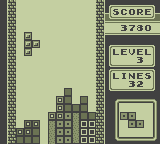

In [48]:
import PIL
from urllib.request import urlopen
Image.open(urlopen(get_link()))

In [3]:
from pkg.utils import get_img_url

In [4]:
get_img_url("Hogan's Alley")

/Users/moyang/.pyenv/versions/3.7.1/envs/amazon_project/lib/python3.7/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/moyang/.pyenv/versions/3.7.1/envs/amazon_project/lib/python3.7/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


'https://png.pngtree.com/png-clipart/20190520/original/pngtree-vector-control-pad-icon-png-image_4237273.jpg'

In [5]:
import wikipedia
wikipedia.WikipediaPage("Hogan's Alley")

DisambiguationError: "Hogan's Alley" may refer to: 
Hogan's Alley (comic strip)
Hogan's Alley (video game)
Hogan's Alley (magazine)
Top Cat
Hogan's Alley (film)
Hogan's Alley (FBI)
Hogan's Alley (Vancouver)
Riviera Country Club
Colonial Country Club

## Try get image

In [1]:
from pkg import utils

In [4]:
utils.get_page("Pokemon Red/Pokemon Blue")

In [2]:
name = "Tetris"

In [6]:
import wikipedia

In [7]:
wikipedia.WikipediaPage(name)

<WikipediaPage 'Tetris'>

In [3]:
utils.get_page(name)

<WikipediaPage 'Tetris'>

In [4]:
utils.get_img_url(name)

'https://upload.wikimedia.org/wikipedia/en/7/7c/Tetris-VeryFirstVersion.png'

In [7]:
from urllib.request import urlopen
from PIL import Image

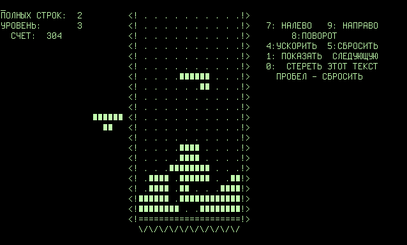

In [8]:
Image.open(urlopen(utils.get_img_url(name)))

In [10]:
utils.get_img_url(name)

'https://upload.wikimedia.org/wikipedia/en/7/7c/Tetris-VeryFirstVersion.png'

## Try Summary

In [2]:
from pkg import utils
catelog = utils.get_catelog_df()

In [20]:
game_genre = 

In [21]:
game_console = catelog[catelog['Name'] == name].iloc[0]['Platform']

In [22]:
game_year = catelog[catelog['Name'] == name].iloc[0]['Year_of_Release']

In [23]:
game_publisher = catelog[catelog['Name'] == name].iloc[0]['Publisher']

In [24]:
utils.game_summary(name, game_console, game_year, game_genre, game_publisher)



'Tetris is an incredible Puzzle game for GB. It was published in 1989 by Nintendo.'

In [3]:
name = catelog[catelog['Year_of_Release'].isna()].iloc[0]['Name']

In [1]:
from pkg import utils
name = 'Madden NFL 2004'

In [2]:
utils.game_info(name)

('Sports', nan, 'Electronic Arts', 'PS2')

In [3]:
utils.game_summary(name)

'Madden NFL 2004 is an incredible Sports game for PS2 published by Electronic Arts.'

In [4]:
import webbrowser

In [5]:
amazon_url = 'https://www.streamlit.io/'
webbrowser.open_new_tab(amazon_url)

True